<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Kepler-Exoplanet-Search-Results" data-toc-modified-id="Kepler-Exoplanet-Search-Results-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Kepler Exoplanet Search Results</a></span></li><li><span><a href="#Pandas-profiling-library" data-toc-modified-id="Pandas-profiling-library-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pandas profiling library</a></span><ul class="toc-item"><li><span><a href="#Column-selection" data-toc-modified-id="Column-selection-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Column selection</a></span></li><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Duplicates</a></span></li><li><span><a href="#NaN-values" data-toc-modified-id="NaN-values-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>NaN values</a></span></li><li><span><a href="#Columns" data-toc-modified-id="Columns-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Columns</a></span><ul class="toc-item"><li><span><a href="#Strip-names" data-toc-modified-id="Strip-names-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Strip names</a></span></li><li><span><a href="#Rename" data-toc-modified-id="Rename-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Rename</a></span></li></ul></li><li><span><a href="#Types" data-toc-modified-id="Types-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Types</a></span></li></ul></li><li><span><a href="#Numerical-columns" data-toc-modified-id="Numerical-columns-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Numerical columns</a></span><ul class="toc-item"><li><span><a href="#Outliers" data-toc-modified-id="Outliers-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Outliers</a></span></li></ul></li><li><span><a href="#Categorical-columns" data-toc-modified-id="Categorical-columns-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Categorical columns</a></span></li><li><span><a href="#Saving-processed-data" data-toc-modified-id="Saving-processed-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Saving processed data</a></span></li></ul></div>

In [29]:
#Importing standard libraries
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Increasing the number of rows and columns shown
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [30]:
# Importing data
kepler = pd.read_csv('../datasets/kepler_detections.csv')
kepler.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


## Column selection

In [31]:
print(f"The dataframe has {kepler.shape[0]} rows and {kepler.shape[1]} columns.")

The dataframe has 9564 rows and 50 columns.


First, we will delete the columns that contain:
- `err`: Matrix covariances are adopted as errors to the fit parameters; they therefore ignore the effects of correlation between the fit parameters and are likely to be underestimates.
- `flag`.

In [32]:
to_drop = [col for col in kepler.columns if ('flag' in col) | ('err1' in col) | ('err2' in col)]
kepler.drop(to_drop, axis=1, inplace=True)

In [33]:
# Other columns we don't want
kepler.drop(['kepler_name', 'koi_score', 'koi_tce_delivname', 'koi_tce_plnt_num', 'rowid', 
             'kepid', 'kepoi_name', 'koi_time0bk'], axis=1, inplace=True)

In [34]:
kepler.shape

(9564, 16)

We have gone from 50 columns to 24.

# Pandas profiling library

In [35]:
import pandas_profiling as pp

In [36]:
# pp.ProfileReport(kepler)

## NaN values

Checking what percentage of NaNs we have in each column and visualizing them:

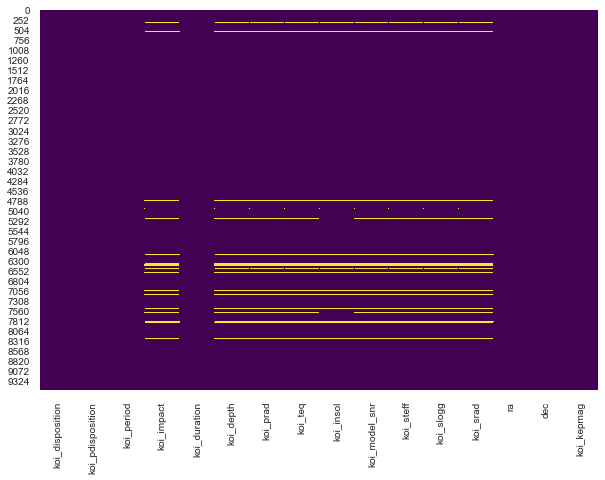

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(kepler.isnull(), cbar=False, cmap='viridis');

In [38]:
nan_values = pd.DataFrame(((kepler.isnull().sum()) / kepler.shape[0]*100).sort_values(ascending=False))
nan_values[nan_values[0] > 0]

,0
koi_srad,3.795483
koi_slogg,3.795483
koi_steff,3.795483
koi_model_snr,3.795483
koi_teq,3.795483
koi_prad,3.795483
koi_depth,3.795483
koi_impact,3.795483
koi_insol,3.356336
koi_kepmag,0.010456


Let's see how the dataframe looks now:

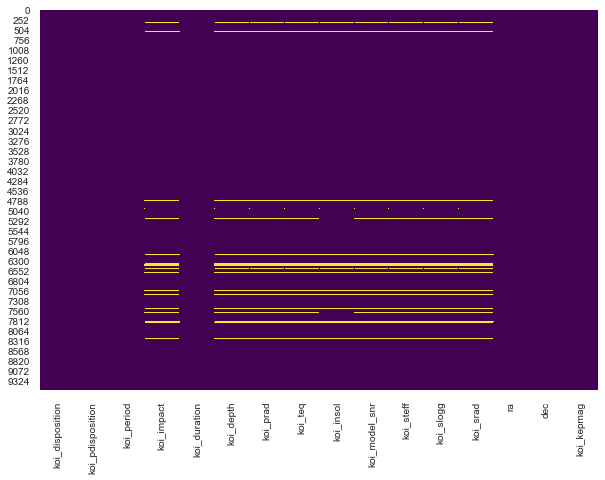

In [39]:
plt.figure(figsize=(10,7))
sns.heatmap(kepler.isnull(), cbar=False, cmap='viridis')
plt.show()

In [40]:
kepler[kepler.isnull().any(axis=1)].head()

,koi_disposition,koi_pdisposition,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
329,FALSE POSITIVE,FALSE POSITIVE,0.734525,NaN,6.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,293.28799,41.560455,13.220
357,FALSE POSITIVE,FALSE POSITIVE,6.721078,NaN,7.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291.60690,38.348061,14.792
476,CANDIDATE,CANDIDATE,1.008617,NaN,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292.47971,38.514919,15.319
490,FALSE POSITIVE,FALSE POSITIVE,200.611033,NaN,7.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.51962,44.453941,15.783
492,FALSE POSITIVE,FALSE POSITIVE,1.634846,NaN,6.11,NaN,NaN,NaN,17098.4,NaN,NaN,NaN,NaN,298.21188,44.324638,12.647


The NaNs are all on the same rows, so we delete them.

In [41]:
kepler = kepler.dropna()

Let's have a look at how many confirmed and false positives we have after dropping all NaNs:

In [42]:
kepler.groupby('koi_disposition').count()

,koi_pdisposition,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
koi_disposition,,,,,,,,,,,,,,,
CANDIDATE,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185
CONFIRMED,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292
FALSE POSITIVE,4723,4723,4723,4723,4723,4723,4723,4723,4723,4723,4723,4723,4723,4723,4723


In [43]:
kepler.shape

(9200, 16)

We've gone from 9564 rows to 9200.

##  Columns

### Fixing names

In [44]:
# Strip
kepler.columns = [col.strip() for col in kepler.columns]

In [45]:
# Removing 'koi_' from all the column names to make it easier to read
new_cols = []

for name in kepler.columns:
    if name.startswith('koi_'):
        name = name.replace('koi_', '')
        new_cols.append(name)
    else:
        new_cols.append(name)
        
kepler.columns = new_cols

### Renaming

In [46]:
kepler.columns

Index(['disposition', 'pdisposition', 'period', 'impact', 'duration', 'depth',
       'prad', 'teq', 'insol', 'model_snr', 'steff', 'slogg', 'srad', 'ra',
       'dec', 'kepmag'],
      dtype='object')

In [47]:
# For better understanding
kepler.rename(columns={'ra': 'right_ascension', 'dec': 'declination', 'koi_period': 'orb_period',
                      'pdisposition':'pre_disposition', 'prad':'planet_radius', 'teq':'planet_temp',
                      'insol':'insolation_flux', 'srad':'star_radius', 'steff':'star_temp', 'slogg':'star_grav'}, inplace=True)

In [48]:
kepler.head()

,disposition,pre_disposition,period,impact,duration,depth,planet_radius,planet_temp,insolation_flux,model_snr,star_temp,star_grav,star_radius,right_ascension,declination,kepmag
0,CONFIRMED,CANDIDATE,9.488036,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,54.418383,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,FALSE POSITIVE,FALSE POSITIVE,19.899140,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,1.736952,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,2.525592,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509


Now that we've removed all the information we didn't want, let's check if the information left is the right **type**.

## Types

In [49]:
kepler.dtypes

disposition         object
pre_disposition     object
period             float64
impact             float64
duration           float64
depth              float64
planet_radius      float64
planet_temp        float64
insolation_flux    float64
model_snr          float64
star_temp          float64
star_grav          float64
star_radius        float64
right_ascension    float64
declination        float64
kepmag             float64
dtype: object

All the columns expected to be numeric are float64 and the ones expected to be strings are object, so everything is correct.  
Next, we will get only the numeric data of the dataframe to visualize outliers with boxplots.

# Numerical columns

In [50]:
kepler.describe().T

,count,mean,std,min,25%,50%,75%,max
period,9200.0,74.315762,1360.612589,0.241843,2.683239,9.300443,36.873842,1.299958e+05
impact,9200.0,0.735059,3.349011,0.000000,0.197000,0.537000,0.888250,1.008060e+02
duration,9200.0,5.654852,6.500038,0.052000,2.453450,3.823930,6.291207,1.385400e+02
depth,9200.0,23789.863435,82247.031935,0.000000,159.900000,421.000000,1473.100000,1.541400e+06
planet_radius,9200.0,102.897725,3077.806350,0.080000,1.400000,2.390000,14.930000,2.003460e+05
planet_temp,9200.0,1085.356848,856.393194,25.000000,539.000000,878.000000,1379.000000,1.466700e+04
insolation_flux,9200.0,7717.364277,159554.192607,0.000000,19.997500,140.670000,853.530000,1.094755e+07
model_snr,9200.0,259.898283,795.849806,0.000000,12.000000,23.000000,78.000000,9.054700e+03
star_temp,9200.0,5706.815326,796.900893,2661.000000,5309.750000,5767.000000,6112.250000,1.589600e+04
star_grav,9200.0,4.310143,0.432628,0.047000,4.218000,4.438000,4.543000,5.364000e+00


In [51]:
kepler_numeric = kepler._get_numeric_data()

## Outliers

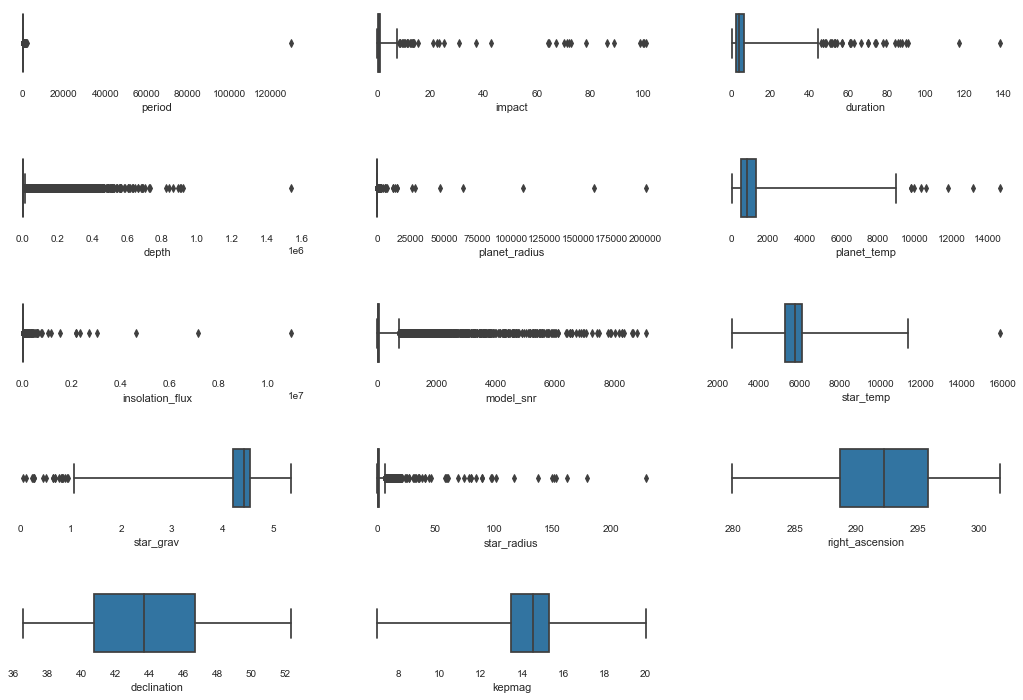

In [53]:
# Visualizing the outliers with boxplots
f = plt.figure(figsize=(18, 12))
i=1

for col in kepler_numeric.columns:
    subplot = f.add_subplot(math.ceil(kepler_numeric.shape[1]/3),3,i)
    sns.boxplot(x=kepler_numeric[col], whis=10)
    i=i+1
plt.subplots_adjust(hspace=1);

Since the information on the dataset has already been through scientific review to enter the dataset, we won't remove the outliers. If they interfere with anything at any point in the future, then we will deal with them.

# Categorical columns

In [54]:
kepler_cat = kepler.select_dtypes(exclude=["number","bool_"])
kepler_cat.head()

,disposition,pre_disposition
0,CONFIRMED,CANDIDATE
1,CONFIRMED,CANDIDATE
2,FALSE POSITIVE,FALSE POSITIVE
3,FALSE POSITIVE,FALSE POSITIVE
4,CONFIRMED,CANDIDATE


In [55]:
set(kepler_cat.disposition)

{'CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'}

In [57]:
set(kepler_cat.pre_disposition)

{'CANDIDATE', 'FALSE POSITIVE'}

All categorical values are correct, we don't any mispelling or extra spaces.

# Saving processed data

In [58]:
kepler.to_csv('../datasets/kepler_processed.csv', index=False)